<a href="https://colab.research.google.com/github/moch1996/Vaycold/blob/main/Python_DataAnalysis/%EC%97%90%EC%96%B4%EB%B9%84%EC%95%A4%EB%B9%84_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A5%BC_%ED%86%B5%ED%95%9C_%EC%88%99%EB%B0%95%EB%B9%84_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from google.colab import drive

In [ ]:
#drive.mount('/content/drive')

# EDA 및 기초통계 분석

## 불필요한 데이터 프레임 제거

In [ ]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.shape

(48895, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

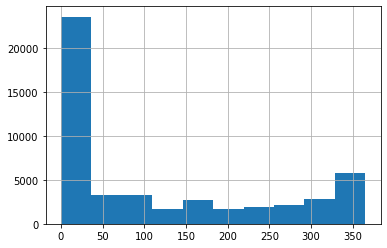

In [ ]:
df['availability_365'].hist()

In [ ]:
#0인 것의 갯수

(df['availability_365'] == 0).sum()

17533

In [ ]:
#각 컬럼간 결측확인

df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
# 불필요한 컬럼 제거

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
df.drop([
         'id', 'name', 'host_name', 'latitude', 'longitude'
], axis=1, inplace=True)
df.head()

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365
1,2845,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,4632,Manhattan,Harlem,Private room,150,3,0,NaN,NaN,1,365
3,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
# 수치형데이터와 Price의 Joint plot 분석하기

In [ ]:
df.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

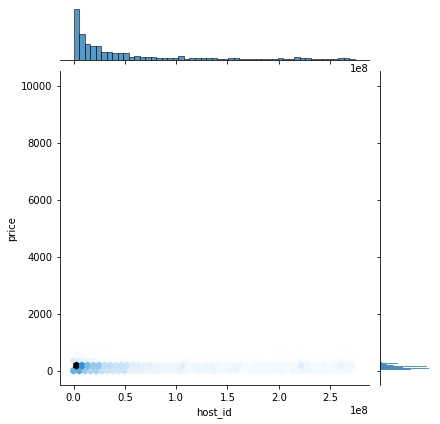

In [ ]:
sns.jointplot(x='host_id', y='price', data=df, kind = 'hex')

#상관성이 별로 없어보임 클리닝과정을 거친 후 다시봐야될듯

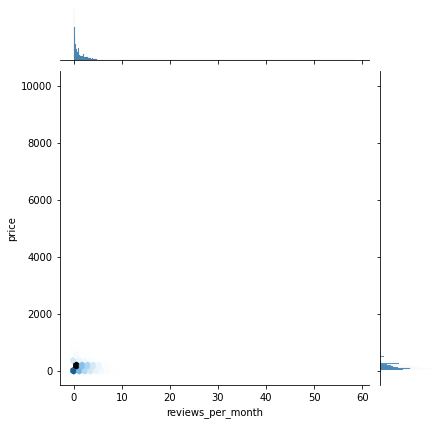

In [ ]:
sns.jointplot(x='reviews_per_month', y='price', data=df, kind = 'hex')

#상관성이 별로 없어보임 클리닝과정을 거친 후 다시봐야될듯

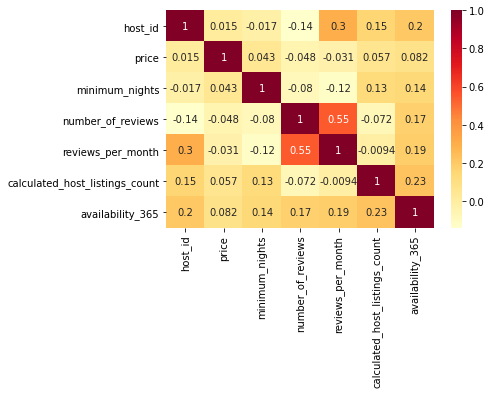

In [ ]:
# 상관성 보기

sns.heatmap(df.corr(), annot= True, cmap = 'YlOrRd')

In [ ]:
# 범주형 데이터와 price의 boxplot 및 히스토그램 분석

In [ ]:
df.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

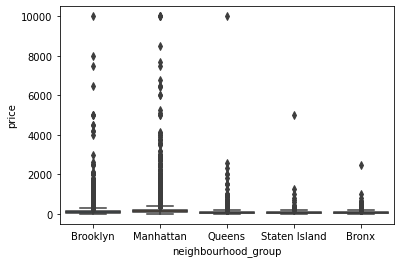

In [ ]:
sns.boxplot(x = 'neighbourhood_group', y='price', data=df)

# 이상치때문에 뭐 제대로 나오질 않음

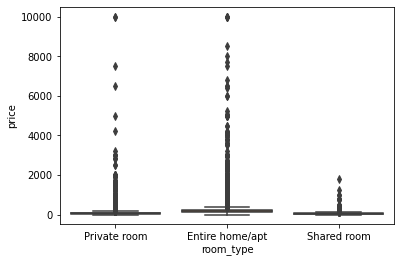

In [ ]:
sns.boxplot(x = 'room_type', y='price', data=df)

# 데이터 클리닝 수행하기

In [ ]:
# 미기입, 오기입 데이터 확인
# - 수치형 데이터는 통계를 이용하여
# - 범주형 데이터는 unique(), value_counts() 등으로 확인

In [ ]:
df.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
df.isna().sum()

host_id                               0
neighbourhood_group                   0
neighbourhood                         0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [ ]:
df['neighbourhood'].value_counts()

#220개임 너무 많아서 다 쓸 수없음 그래서 줄여야댐

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Woodrow                  1
Richmondtown             1
Willowbrook              1
Rossville                1
Fort Wadsworth           1
Name: neighbourhood, Length: 221, dtype: int64

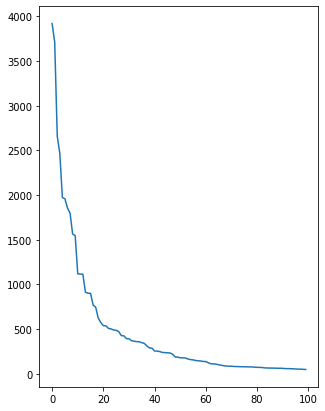

In [ ]:
plt.figure(figsize=(5,7))
neigh = df['neighbourhood'].value_counts()
plt.plot(range(len(neigh[:100])),neigh[:100])

In [ ]:
df['neighbourhood'] = df['neighbourhood'].apply(lambda s : s if str(s) not in neigh[50:] else 'others')

In [ ]:
df['neighbourhood'].value_counts()

others                       6248
Williamsburg                 3920
Bedford-Stuyvesant           3714
Harlem                       2658
Bushwick                     2465
Upper West Side              1971
Hell's Kitchen               1958
East Village                 1853
Upper East Side              1798
Crown Heights                1564
Midtown                      1545
East Harlem                  1117
Greenpoint                   1115
Chelsea                      1113
Lower East Side               911
Astoria                       900
Washington Heights            899
West Village                  768
Financial District            744
Flatbush                      621
Clinton Hill                  572
Long Island City              537
Prospect-Lefferts Gardens     535
Park Slope                    506
East Flatbush                 500
Fort Greene                   489
Murray Hill                   485
Kips Bay                      470
Flushing                      426
Ridgewood     

In [ ]:
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

이번에는 수치형데이터

In [ ]:
# 이번에는 수치형데이터

In [ ]:
df.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

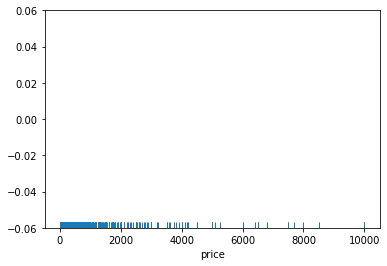

In [ ]:
sns.rugplot(df['price'])

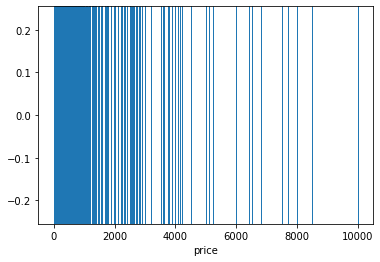

In [ ]:
sns.rugplot(x='price', data=df, height=1)

In [ ]:
print(df['price'].quantile(0.95)) # 상위 5%는 355$
print(df['price'].quantile(0.005)) # 하위 0.5%는 26$

355.0
26.0


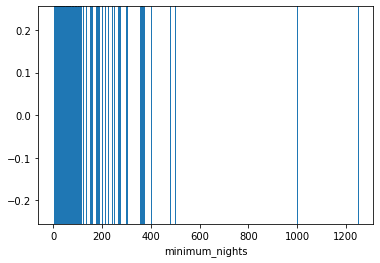

In [ ]:
# Minimum_nights
sns.rugplot(x='minimum_nights', data=df, height=1)

In [ ]:
print(df['minimum_nights'].quantile(0.98)) # 상위 2%는 30일

30.0


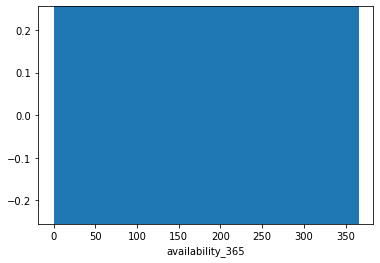

In [ ]:
sns.rugplot(x='availability_365', data=df, height=1)

In [ ]:
print(df['availability_365'].quantile(0.4)) # 0인지 아닌지로 나눠도 될듯

8.0


In [ ]:
# 이상치 제거

In [ ]:
p1 = df['price'].quantile(0.95)
p2 = df['price'].quantile(0.005)
print(p1,"",p2)

355.0  26.0


In [ ]:
df = df[
                 (df['price'] < p1) & (df['price'] > p2)
]

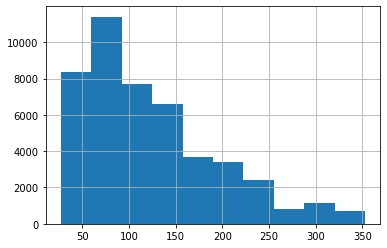

In [ ]:
df['price'].hist()

In [ ]:
mn1 = df['minimum_nights'].quantile(0.98)
print(mn1)

30.0


In [ ]:
df = df[df['minimum_nights']<mn1]

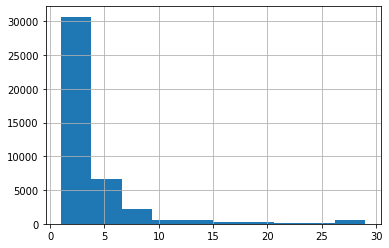

In [ ]:
df['minimum_nights'].hist()

In [ ]:
# availability_365가 0일때 다른 카테고리로 하기로했당

df['availability_365'].apply(lambda x : 'Zero' if x == 0  else 'Non Zero')

0        Non Zero
1        Non Zero
2        Non Zero
3        Non Zero
4            Zero
           ...   
48890    Non Zero
48891    Non Zero
48892    Non Zero
48893    Non Zero
48894    Non Zero
Name: availability_365, Length: 41980, dtype: object

In [ ]:
df['is_avail_zero'] = df['availability_365'].apply(lambda x : 'Zero' if x == 0  else 'Non Zero')

In [ ]:
# 미기입 데이터 처리하기

In [ ]:
df.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'is_avail_zero'],
      dtype='object')

In [ ]:
df['review_exists'] = df['reviews_per_month'].isna().apply(lambda x : 'No' if x is True else 'Yes')

In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df.isna().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
is_avail_zero                     0
review_exists                     0
dtype: int64

# 모델학습을 위한 전처리

In [ ]:
df.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'is_avail_zero', 'review_exists'],
      dtype='object')

In [ ]:
X_cat = df[['neighbourhood_group', 'neighbourhood', 'room_type', 'is_avail_zero', 'review_exists']]
X_cat = pd.get_dummies(X_cat)

In [ ]:
X_cat.head()

,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_Astoria,neighbourhood_Bedford-Stuyvesant,neighbourhood_Bushwick,neighbourhood_Carroll Gardens,neighbourhood_Chelsea,neighbourhood_Chinatown,neighbourhood_Clinton Hill,neighbourhood_Crown Heights,neighbourhood_Ditmars Steinway,neighbourhood_East Elmhurst,neighbourhood_East Flatbush,neighbourhood_East Harlem,neighbourhood_East New York,neighbourhood_East Village,neighbourhood_Elmhurst,neighbourhood_Financial District,neighbourhood_Flatbush,neighbourhood_Flushing,neighbourhood_Fort Greene,neighbourhood_Gowanus,neighbourhood_Gramercy,neighbourhood_Greenpoint,neighbourhood_Greenwich Village,neighbourhood_Harlem,neighbourhood_Hell's Kitchen,neighbourhood_Inwood,neighbourhood_Jackson Heights,neighbourhood_Jamaica,neighbourhood_Kips Bay,neighbourhood_Long Island City,neighbourhood_Lower East Side,neighbourhood_Midtown,neighbourhood_Morningside Heights,neighbourhood_Murray Hill,neighbourhood_Nolita,neighbourhood_Park Slope,neighbourhood_Prospect Heights,neighbourhood_Prospect-Lefferts Gardens,neighbourhood_Ridgewood,neighbourhood_SoHo,neighbourhood_South Slope,neighbourhood_Sunnyside,neighbourhood_Sunset Park,neighbourhood_Theater District,neighbourhood_Upper East Side,neighbourhood_Upper West Side,neighbourhood_Washington Heights,neighbourhood_West Village,neighbourhood_Williamsburg,neighbourhood_Woodside,neighbourhood_others,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,is_avail_zero_Non Zero,is_avail_zero_Zero,review_exists_No,review_exists_Yes
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'is_avail_zero', 'review_exists'],
      dtype='object')

In [ ]:
scaler = StandardScaler()
X_num = df.drop([
                 'neighbourhood_group', 'neighbourhood', 'room_type', 'price', 'is_avail_zero', 'review_exists', 'last_review'
], axis = 1)
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index = X_num.index, columns = X_num.columns)

X = pd.concat([X_scaled, X_cat], axis=1)
y = df['price']

In [ ]:
X.head()

,host_id,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_Astoria,neighbourhood_Bedford-Stuyvesant,neighbourhood_Bushwick,neighbourhood_Carroll Gardens,neighbourhood_Chelsea,neighbourhood_Chinatown,neighbourhood_Clinton Hill,neighbourhood_Crown Heights,neighbourhood_Ditmars Steinway,neighbourhood_East Elmhurst,neighbourhood_East Flatbush,neighbourhood_East Harlem,neighbourhood_East New York,neighbourhood_East Village,neighbourhood_Elmhurst,neighbourhood_Financial District,neighbourhood_Flatbush,neighbourhood_Flushing,neighbourhood_Fort Greene,neighbourhood_Gowanus,neighbourhood_Gramercy,neighbourhood_Greenpoint,neighbourhood_Greenwich Village,neighbourhood_Harlem,neighbourhood_Hell's Kitchen,neighbourhood_Inwood,neighbourhood_Jackson Heights,neighbourhood_Jamaica,neighbourhood_Kips Bay,neighbourhood_Long Island City,neighbourhood_Lower East Side,neighbourhood_Midtown,neighbourhood_Morningside Heights,neighbourhood_Murray Hill,neighbourhood_Nolita,neighbourhood_Park Slope,neighbourhood_Prospect Heights,neighbourhood_Prospect-Lefferts Gardens,neighbourhood_Ridgewood,neighbourhood_SoHo,neighbourhood_South Slope,neighbourhood_Sunnyside,neighbourhood_Sunset Park,neighbourhood_Theater District,neighbourhood_Upper East Side,neighbourhood_Upper West Side,neighbourhood_Washington Heights,neighbourhood_West Village,neighbourhood_Williamsburg,neighbourhood_Woodside,neighbourhood_others,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,is_avail_zero_Non Zero,is_avail_zero_Zero,review_exists_No,review_exists_Yes
0,-0.848227,-0.588004,-0.352358,-0.588299,0.066069,2.132586,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1
1,-0.848227,-0.588004,0.419649,-0.485721,-0.084134,2.052616,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
2,-0.848204,-0.119342,-0.545360,-0.715013,-0.121684,2.132586,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
3,-0.848200,-0.588004,5.244692,2.084766,-0.121684,0.765095,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
4,-0.848170,1.520973,-0.352358,-0.654673,-0.121684,-0.786327,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1


In [ ]:
y.head()

0    149
1    225
2    150
3     89
4     80
Name: price, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# Gradient Boost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
model_reg = XGBRegressor()
model_reg.fit(X_train, y_train)

[11:35:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [ ]:
pred = model_reg.predict(X_test)
print(mean_absolute_error(y_test, pred))
print(sqrt(mean_squared_error(y_test, pred)))

35.37089085317669
49.393558422539826


# 모델학습결과 심화분석

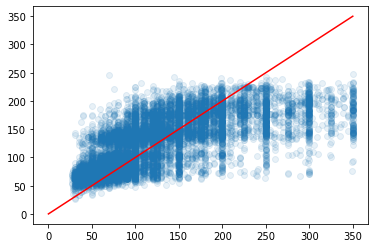

In [ ]:
# 실제값과 예측값을 플롯팅

plt.scatter(y_test, pred, alpha = 0.1)
plt.plot([0,350],[0,350],'r-')

# 범주형 자료에 의존하게 되는 회귀모형의 한계가 보임

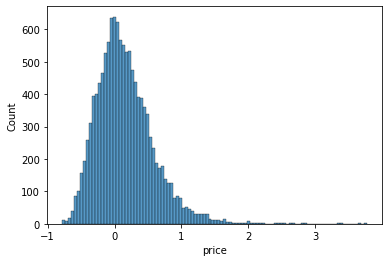

In [ ]:
# error 값의 히스토그램
err = (pred - y_test) / y_test
sns.histplot(err)